In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
     

In [2]:
from datasets import load_dataset

ds = load_dataset("mashequr/images_of_dog_breeds")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


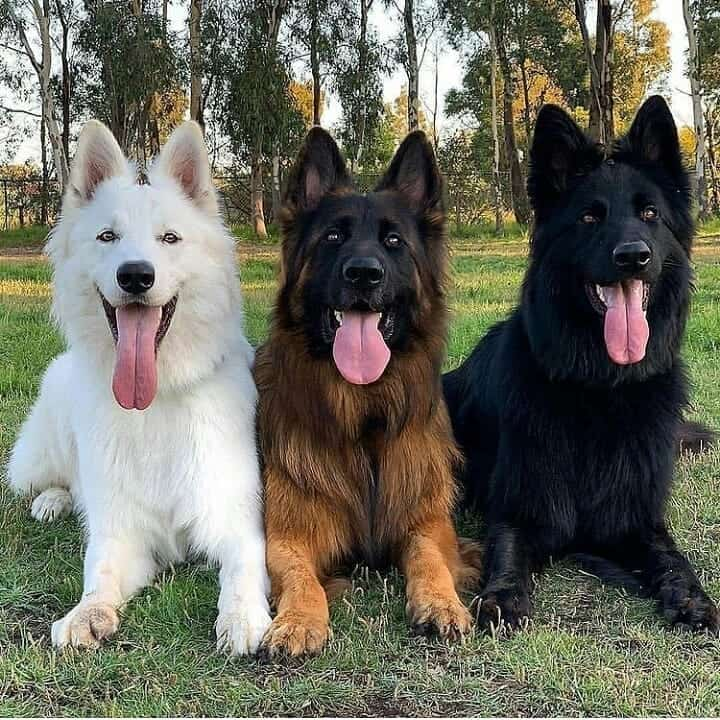

In [3]:
ds['train'][1]['image']

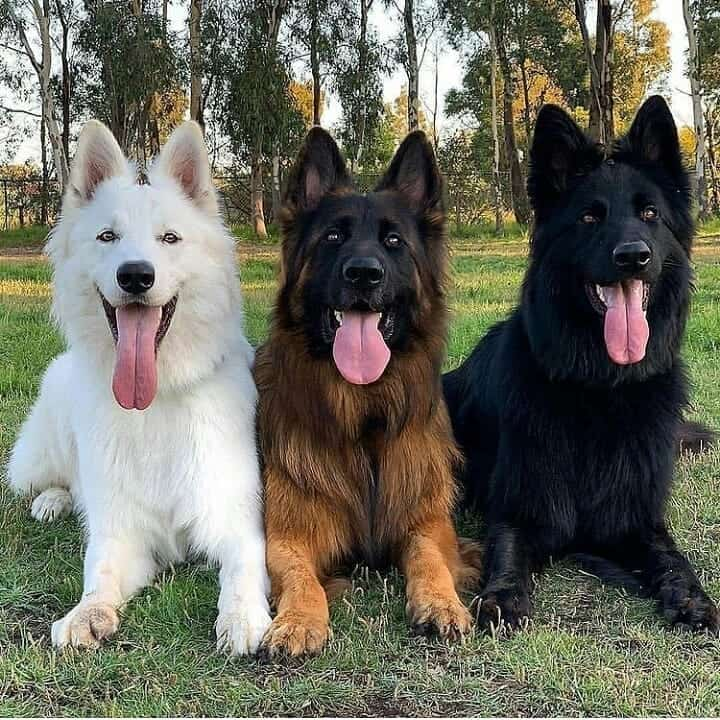

In [4]:
images = []

for i, x in enumerate(ds['train']):
  images.append(ds['train'][i]['image'])

images[1]

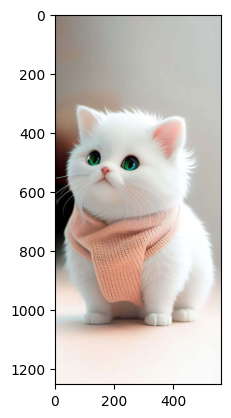

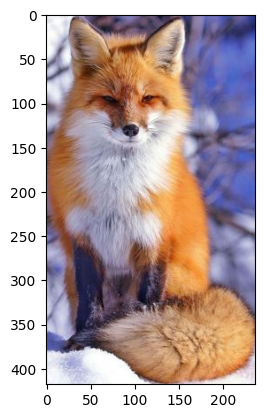

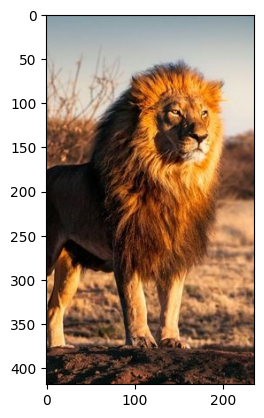

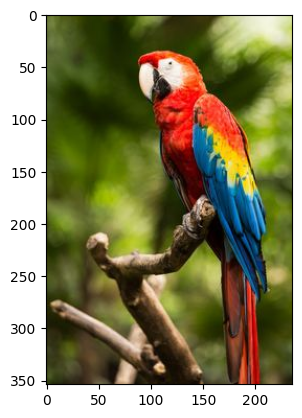

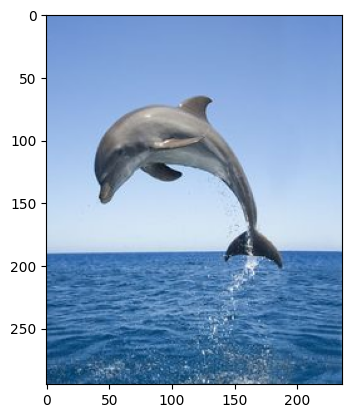

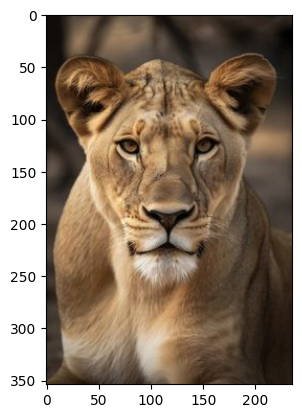

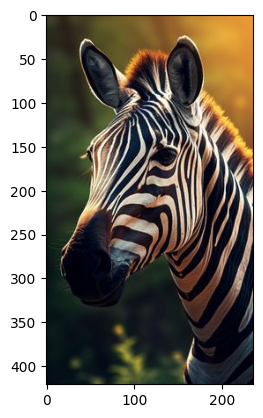

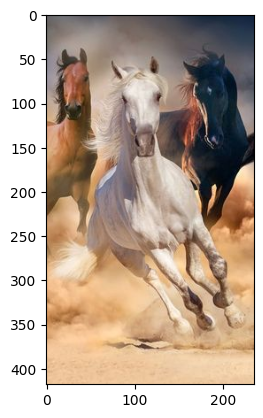

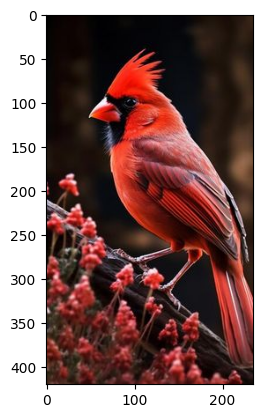

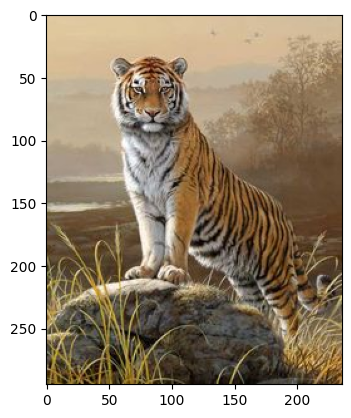

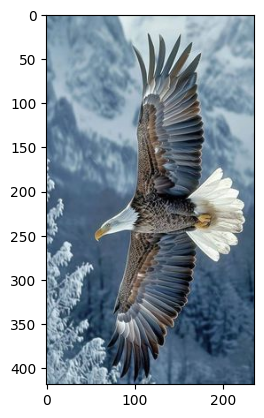

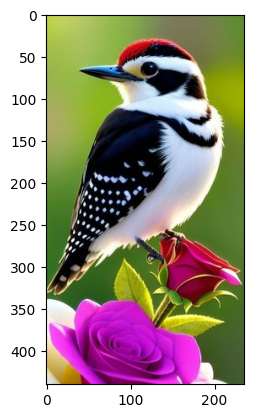

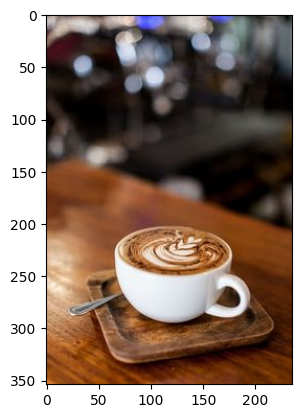

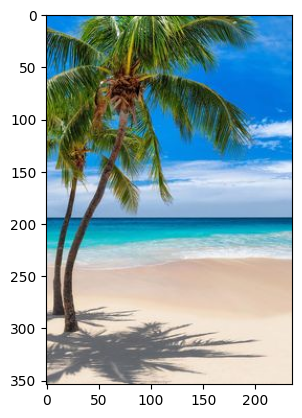

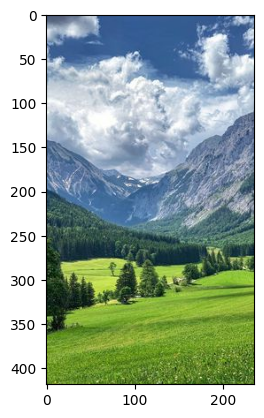

In [1]:
import requests
import numpy as np
from  matplotlib import pyplot as plt
from PIL import Image

urls = [
    'https://i.pinimg.com/564x/41/44/b8/4144b805cdcf2f850e5c6a9be9b52489.jpg',
    'https://i.pinimg.com/236x/43/37/7b/43377b63e89966d322266357ab3f42b8.jpg',
    'https://i.pinimg.com/236x/51/ce/6a/51ce6a3f68585bb4bf3963a09ea7c323.jpg',
    'https://i.pinimg.com/236x/f3/70/8e/f3708ed3b06c862d3fc00ebd8c75ba38.jpg',
    'https://i.pinimg.com/236x/98/27/82/9827829754ac6c16ee28410dce34385c.jpg',
    'https://i.pinimg.com/236x/0b/9c/5d/0b9c5d18d15dfe798167ebd6f6e0425d.jpg',
    'https://i.pinimg.com/236x/0c/3a/f5/0c3af5949f5053c5285e00bfeb1ef446.jpg',
    'https://i.pinimg.com/236x/9c/7b/05/9c7b050e83b0e6aa3a17ac56e7b02258.jpg',
    'https://i.pinimg.com/236x/46/be/63/46be637b10d54ff03c9515dd021d0a52.jpg',
    'https://i.pinimg.com/236x/c6/6e/57/c66e578d76b6c1f783bb17235e77426b.jpg',
    'https://i.pinimg.com/236x/8a/a0/7f/8aa07fe290ce4a64b96e5d08cb1692f4.jpg',
    'https://i.pinimg.com/236x/ff/ee/cd/ffeecdb3392afe1dce998fb0fe7072b4.jpg',
    'https://i.pinimg.com/236x/67/cd/c1/67cdc1683f91f9916de003ca3c94ef57.jpg',
    'https://i.pinimg.com/236x/90/a4/03/90a40361836bba517c354e72a9a1a710.jpg',
    'https://i.pinimg.com/236x/82/0d/5f/820d5f79056469316e0bbe76134e70db.jpg'
]

images = [
 Image.open(requests.get(url, stream=True).raw) for url in urls]

for image in images:
  plt.show(plt.imshow(np.asarray(image)))

In [5]:
from PIL import Image
from numpy import asarray

imgs = []

for image in images:
  imgs.append(asarray(image))

In [2]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [23]:
caption = 'horse'

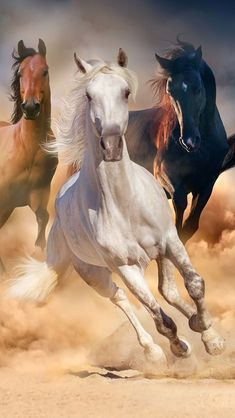

In [24]:
inputs = processor(text=caption, images=images, return_tensors="pt", padding=True)
outputs = model(**inputs)

probs = outputs.logits_per_image.argmax()
images[probs.item()]

In [25]:
caption2 = 'cat'

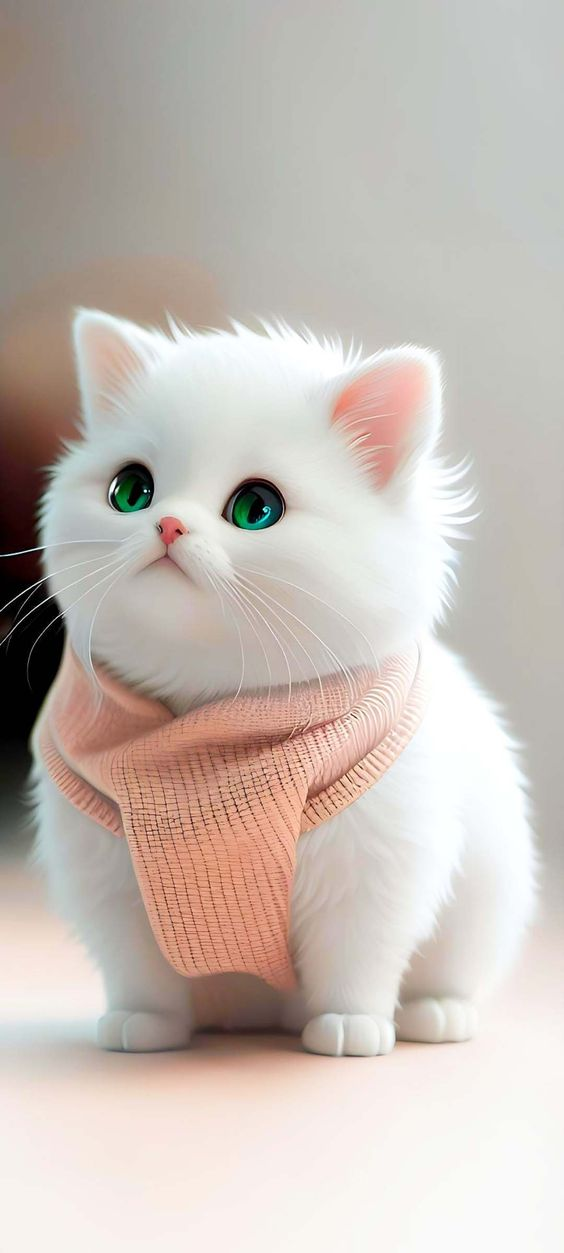

In [27]:
inputs = processor(text=caption2, images=images, return_tensors="pt", padding=True)
outputs = model(**inputs)

probs = outputs.logits_per_image.argmax()
images[probs.item()]